In [1]:
import sqlite3

# Step 1: Connect to (or create) the SQLite database
conn = sqlite3.connect("sales_data.db")  # This will create sales_data.db in Colab's environment
cursor = conn.cursor()

# Step 2: Create a sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 3: Insert sample sales data
sample_data = [
    ("Apple", 10, 1.5),
    ("Banana", 5, 0.8),
    ("Orange", 8, 1.2),
    ("Apple", 7, 1.5),
    ("Banana", 6, 0.8),
    ("Orange", 4, 1.2),
    ("Grapes", 12, 2.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Step 4: Commit and close
conn.commit()
conn.close()

print("✅ Step 1 complete: sales_data.db created with sample sales table.")


✅ Step 1 complete: sales_data.db created with sample sales table.


In [3]:
import sqlite3
import pandas as pd

# Reconnect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# SQL query to summarize sales
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
"""

# Load the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the summary table
print("✅ Sales Summary:")
print(df)


✅ Sales Summary:
  product  total_quantity  revenue
0   Apple              17     25.5
1  Banana              11      8.8
2  Grapes              12     24.0
3  Orange              12     14.4


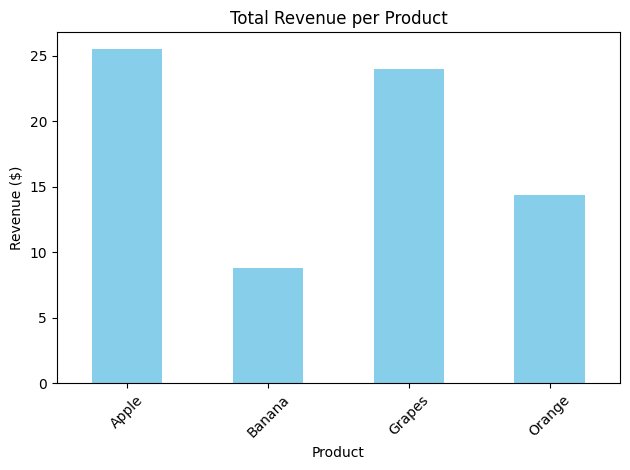

In [4]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

# Add chart labels and title
plt.title("Total Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()
